<a href="https://colab.research.google.com/github/tusharareddy209/Msc-Big-Data-Science-with-Machine-Learning/blob/main/Assignment1_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1, part 1 of 2
Please show your work - i.e., show and explain your code/math, and write your reasoning.

[1 mark] Load the CSV file country-income-large.csv, which includes both numerical and categorical attributes. Replace NaN values with the mean of the corresponding variable. Display a scatter plot of the resulting dataset, using the numerical variables only, color-coded according to the "Region" column. You are allowed (and encouraged) to seek existing functions for these purposes (e.g. in Pandas).

In [5]:
import pandas as pd

data = pd.read_csv('country-income-large.csv',header=0)
data.columns = ['Sl.No','Region','Age','Income','Online Shopper']
data = data.drop(['Sl.No'],axis=1)
print('No of instances = %d' % (data.shape[0]))
print('No of attributes = %d' % (data.shape[1]))
data.head()

No of instances = 60
No of attributes = 4


,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [6]:
import numpy as np

data = data.replace('?',np.NaN)
print('No of instances = %d' %(data.shape[0]))
print('No of attributes = %d' %(data.shape[1]))
print( 'Number of missing values')
for col in data.columns:
    print('\t%s: %d' %(col,data[col].isna().sum()))

No of instances = 60
No of attributes = 4
Number of missing values
	Region: 0
	Age: 1
	Income: 1
	Online Shopper: 0


In [7]:
part1_data = data.copy()
print('before replacing Age and Income column:')
print(part1_data[0:10])

before replacing Age and Income column:
   Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes


In [34]:
part1_data = part1_data.fillna(part1_data.mean())
print('after replacing Age and Income column:')
part1_data[0:10]

after replacing Age and Income column:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Region,Age,Income,Online Shopper
0,India,49.000000,86400.000000,No
1,Brazil,32.000000,57600.000000,Yes
2,USA,35.000000,64800.000000,No
3,Brazil,43.000000,73200.000000,No
4,USA,45.000000,86098.305085,Yes
5,India,40.000000,69600.000000,Yes
6,Brazil,48.305085,62400.000000,No
7,India,53.000000,94800.000000,Yes
8,USA,55.000000,99600.000000,No
9,India,42.000000,80400.000000,Yes


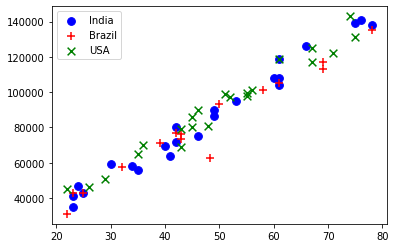

In [9]:
import matplotlib.pyplot as plt

region = {'India':'b', 'Brazil':'r', 'USA':'g'}
marktype = {'India':'o', 'Brazil':'+', 'USA':'x'}
for country in marktype:
  d= part1_data[part1_data['Region']==country]
  plt.scatter(d['Age'],d['Income'], c= region[country], s=60, marker= marktype[country], label=country)
plt.legend()


[1 mark] Apply the following binning techniques on the previously cleaned data, assuming 5 bins in each case:
Equal-frequency binning
Equal-width binning
Report the results.

(30999.999, 57920.0]    12
(57920.0, 75600.0]      12
(75600.0, 95680.0]      12
(95680.0, 117000.0]     13
(117000.0, 143000.0]    11
Name: Income, dtype: int64

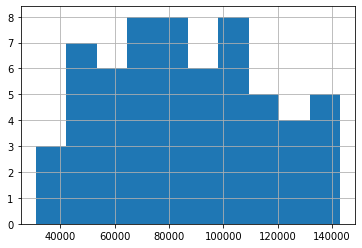

In [50]:
#equal-frequency
bins1 = pd.qcut(part1_data['Income'],5)
part1_data['Income'].hist()
bins1.value_counts(sort=False)

(30888.0, 53400.0]      10
(53400.0, 75800.0]      14
(75800.0, 98200.0]      14
(98200.0, 120600.0]     13
(120600.0, 143000.0]     9
Name: Income, dtype: int64

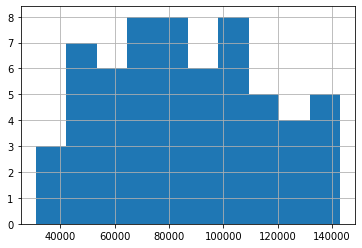

In [55]:
#equal-width
bins2 = pd.cut(part1_data['Income'],5)
part1_data['Income'].hist()
bins2.value_counts(sort=False)

[1 mark] Compute the Pearson correlation coefficient of the numerical variables. Would you say that the variables are strongly correlated? Did you need to compute the correlation coefficient to reach that conclusion?

In [59]:
Pearson_CC = np.corrcoef(part1_data['Income'],part1_data['Age'])
Pearson_CC

array([[1.        , 0.98095182],
       [0.98095182, 1.        ]])

Response: Yes, the variables are strongly correlated. The value 1 in the diagonal matrix indicates that each variable has a linear correlation with itself. The 0.98 value idicates that variable 'Income' and 'Age' Have a high correlation close to 1 which is positive. We dont need to compute the correlation coefficient to deduce this, but there culd be exceptions.


[1 mark] Use the Chi-squared test to determine whether the categorical attributes are correlated.

In [77]:
contingency_1 = pd.crosstab(part1_data['Region'],part1_data['Online Shopper'])
contingency_1

Online Shopper,No,Yes
Region,,
Brazil,9,6
India,12,11
USA,15,7


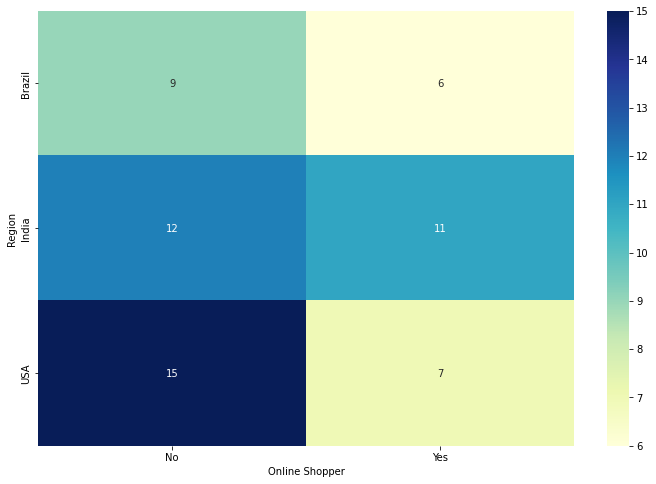

In [80]:
import seaborn as sns
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency_1, annot=True, cmap="YlGnBu")

In [82]:
from scipy.stats.contingency import chi2_contingency
c, p ,dof, expected = chi2_contingency(contingency_1)
print (c, p, dof, expected)

1.200592885375495 0.5486489690094807 2 [[ 9.   6. ]
 [13.8  9.2]
 [13.2  8.8]]


Response: The p-value is 0.5486 at degree of freedom 2,at 95% level of confidence we reject the null hypothesis, stating that the 'Region' and 'Online Shopper' columns in the country-income-large.csv dataset are correlated.

[1 mark] Take the pre-processed breast cancer dataset from subsection 1.1 of this notebook (where we replaced any missing values with their median). Compute the principal components and report the variance explained by each of them (remove the "Class" column before doing PCA). Show the scatter plot of all samples along the first two principal components, color-coded according to the "Class" column. Ensure that your data is normalized by z-scores prior to performing PCA. Do you think PCA is useful as a preprocessing step for classification in this case?

In [90]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']
data = data.drop(['Class'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 10


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [86]:
import numpy as np

data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0


In [89]:
data_bn = data.fillna(data.median())
data_bn['Bare Nuclei'].isna().sum()

0

In [94]:
  import pandas as pd
  from sklearn.decomposition import PCA

  numComponents = 2
  pca = PCA(n_components=numComponents)
  pca.fit(data_bn)

  projected = pca.transform(data_bn)
  projected = pd.data_bn(projected,columns=['pc1','pc2'],index=range(1,n+1))
  projected

AttributeError: ignored